<a href="https://colab.research.google.com/github/KatiaItzelCortes/EDP/blob/main/Prueba%20de%20Frecuancias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prueba de Frecuencias



Para ver que tienen una distribución uniforme vamos a tener las siguientes hipotesis:

$H_0$: Los datos siguen una distribución uniforme (son aleatorios).

$H_1$: Los datos no siguen una distribución uniforme (no son aleatorios).

De lo cual nos vamos a apoyar de una prueba chi_cuadrada en donde el valor de Chi_cuadrada se obtiene mediante:
$$ \chi^{2*} = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i} $$

In [24]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import tabulate

In [2]:
data = [
    0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
    0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
    0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
    0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
    0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
    0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
    0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
    0.79882, 0.45679, 0.21631, 0.87616, 0.55743,
    0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
    0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
    0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
    0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
    0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
    0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
    0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
    0.58244, 0.85853, 0.86752, 0.38729, 0.15506,
    0.23949, 0.53559, 0.33381, 0.49883, 0.75103,
    0.19962, 0.65002, 0.74579, 0.79113, 0.63453,
    0.19147, 0.40644, 0.08128, 0.73435, 0.22724,
    0.22287, 0.07281, 0.64183, 0.44267, 0.72102
]

Sacamos el numero de frecuencias observadas  oi  en cada intervalo

In [3]:
conteo1 = 0
conteo2 = 0
conteo3 = 0
conteo4 = 0
conteo5 = 0

for x in data:
  if 0 <= x < 0.2:
    conteo1 += 1
  elif x >= 0.2 and x < 0.4:
    conteo2 += 1
  elif 0.4 <= x < 0.6:
    conteo3 += 1
  elif 0.6 <= x < 0.8:
    conteo4 += 1
  elif 0.8 <= x <= 1:
    conteo5 += 1
conteo1, conteo2, conteo3, conteo4, conteo5

(21, 22, 19, 23, 15)

Sacamos las frecuencias esperadas $e_i = np$

In [4]:
P = 1 / 5
N = len(data)
valor_esperado = N * P

# Crea una lista con el mismo valor repetido 5 veces
esperados = [valor_esperado] * 5
conteos = [conteo1, conteo2, conteo3, conteo4, conteo5]
esperados, conteos

([20.0, 20.0, 20.0, 20.0, 20.0], [21, 22, 19, 23, 15])

Lo colocalos todo en una tabla, definimos los intervalos y cada parte de la sumatoria de chi_cuadrada

In [17]:
intervalos = ["[0.0-0.2)", "[0.2-0.4)", "[0.4-0.6)", "[0.6-0.8)", "[0.8-1.0]"]
chi_cuadrado_contribuciones = [(conteos[i] - esperados[i])**2 / esperados[i] for i in range(len(conteos))]

muestra = []
for i in range(len(conteos)):
  muestra.append([intervalos[i], esperados[i], conteos[i], chi_cuadrado_contribuciones[i]])

encabezados = ["intervalos", "esperados", "observados", "(o - e)^2/e"]
print(tabulate.tabulate(muestra, headers=encabezados, tablefmt="psql", numalign="center"))

+--------------+-------------+--------------+---------------+
| intervalos   |  esperados  |  observados  |  (o - e)^2/e  |
|--------------+-------------+--------------+---------------|
| [0.0-0.2)    |     20      |      21      |     0.05      |
| [0.2-0.4)    |     20      |      22      |      0.2      |
| [0.4-0.6)    |     20      |      19      |     0.05      |
| [0.6-0.8)    |     20      |      23      |     0.45      |
| [0.8-1.0]    |     20      |      15      |     1.25      |
+--------------+-------------+--------------+---------------+


Calculamos nuestro estadistico chi_cuadrado ($X^{2*}$)

In [5]:
chi_cuadrado = 0
for i in range(5):
  chi_cuadrado += (conteos[i] - esperados[i])**2 / esperados[i]

print(f"El valor de X² es: {chi_cuadrado}")

El valor de X² es: 2.0


Comparamos el chi_chuadrada  con el chi_critico para ver si la hipotesis nula es aceptada o rechazada

In [22]:
def prueba_frecuencias(data, alfa, k=5):
    gl = k - 1
    chi_critico = st.chi2.ppf(1 - alfa, gl)

    if chi_cuadrado < chi_critico:
        print(f"No se rechaza la hipótesis nula: Los datos siguen una distribución uniforme U(0, 1)")
    else:
        print(f"Se rechaza la hipótesis nula: Los datos no siguen una distribución uniforme U(0, 1)")

    return chi_cuadrado, chi_critico

In [23]:
prueba_frecuencias(data, 0.05)

No se rechaza la hipótesis nula: Los datos siguen una distribución uniforme U(0, 1)


(2.0, np.float64(9.487729036781154))

Graficamos La frecuancia observada y la frecuencia observada

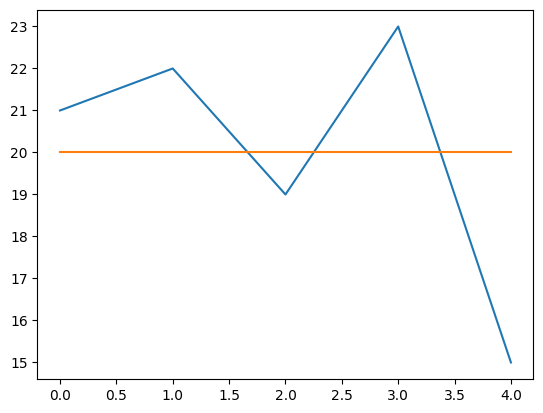

In [9]:
plt.plot(conteos)
plt.plot(esperados)
plt.show()